<a href="https://colab.research.google.com/github/GauriMittal24/AI-lab-assignments/blob/main/app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
print(sys.version)

3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]


In [ ]:
import pandas as pd
print(pd.__version__)

1.5.3


Top 10 hits as per unique IP address:
91.139.164.207    719
46.238.56.74      703
31.211.159.44     621
149.62.204.185    476
176.12.22.61      445
212.39.89.183     438
93.183.177.26     423
165.225.203.37    417
109.189.93.87     387
94.155.70.230     349
Name: IP Address, dtype: int64


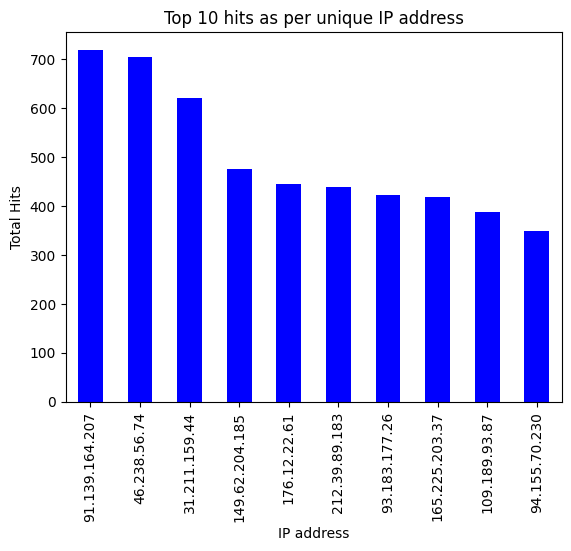

Total Unique HTTP Status Codes: 7
Top 10 Hits per URL:
GET /wp-content/uploads/2021/05/HLGN-Logo.png HTTP/2.0                          162
POST /?wc-ajax=get_refreshed_fragments HTTP/2.0                                 135
POST /wp-admin/admin-ajax.php HTTP/2.0                                          100
GET / HTTP/2.0                                                                   89
GET /wp-content/uploads/2021/02/NargileFB.jpg HTTP/1.1                           42
GET /category/nargileta/ HTTP/2.0                                                39
GET /wp-includes/js/jquery/ui/menu.min.js?ver=1.13.1 HTTP/2.0                    38
GET /wp-content/plugins/woocommerce-econt/inc/js/econt.js?ver=1.3.9 HTTP/2.0     38
GET /wp-includes/js/mediaelement/wp-mediaelement.min.css?ver=5.9.1 HTTP/2.0      37
GET /wp-includes/js/jquery/ui/autocomplete.min.js?ver=1.13.1 HTTP/2.0            37
Name: Request Info, dtype: int64


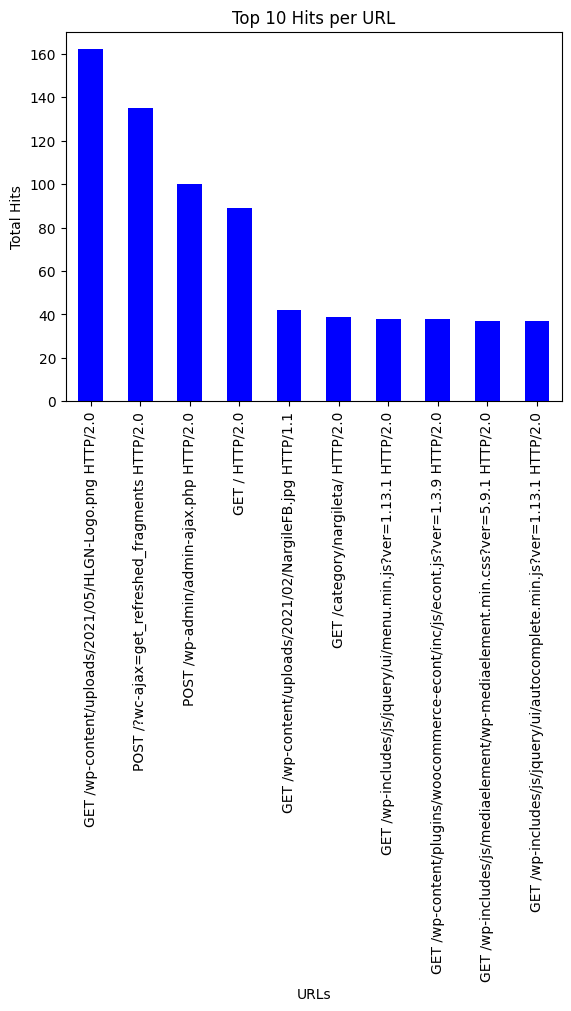

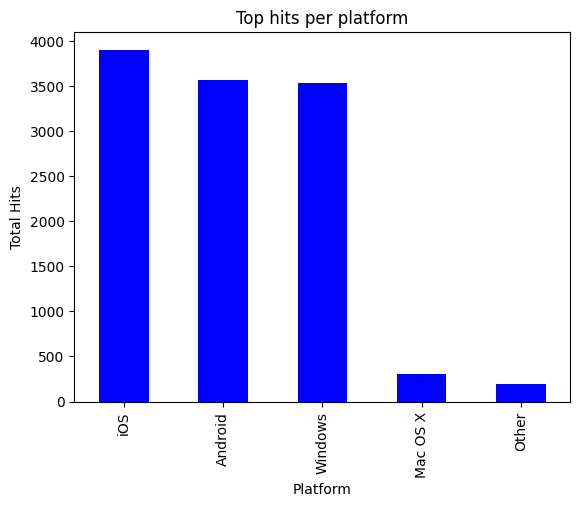

Total hits per browser:
Chrome Mobile                 2857
Chrome                        2423
Mobile Safari                 2002
Opera                          628
Chrome Mobile iOS              621
Instagram                      605
Firefox                        581
Google                         439
Facebook                       418
Chrome Mobile WebView          357
Edge                           151
Samsung Internet               119
Safari                          71
bingbot                         66
FacebookBot                     55
Googlebot                       53
PetalBot                        17
Other                           10
SemrushBot                       9
Mobile Safari UI/WKWebView       4
AhrefsBot                        3
Googlebot-Image                  2
WordPress                        1
MJ12bot                          1
Name: Browser, dtype: int64
Visualizing top 10 hits per browser:


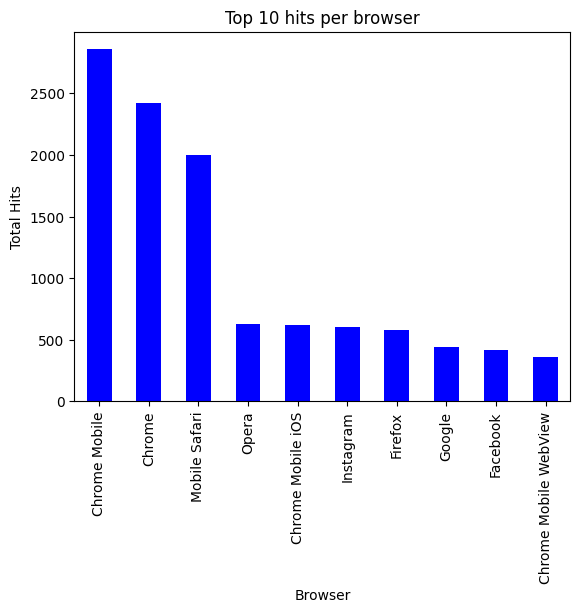

Top 10 hits hourly basis:
16    4164
15    3924
14    3405
Name: Hour, dtype: int64


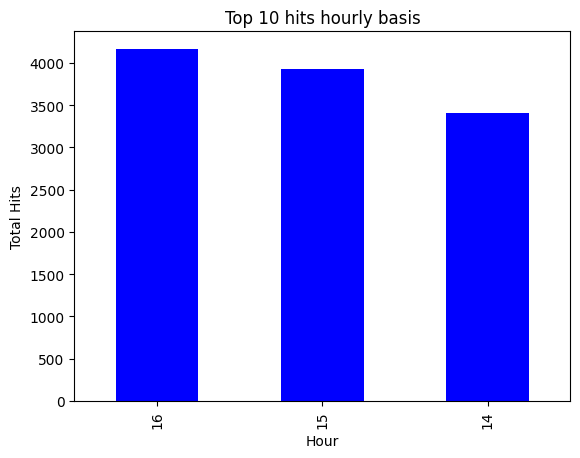

Hour                                                          14  \
Referer                                                            
-                                                   5.555939e+06   
http://cpcalendars.nargile.bg/                      0.000000e+00   
http://cpcontacts.nargile.bg/                       0.000000e+00   
http://m.facebook.com/                              1.017647e+05   
http://mail.nargile.bg/                             0.000000e+00   
...                                                          ...   
https://nargile.bg/wp-content/uploads/2021/11/a...  5.393333e+02   
https://nargile.bg/wp-content/uploads/2021/12/x...  5.982667e+04   
https://www.bing.com/                               2.557633e+04   
https://www.google.com/                             4.761273e+05   
https://www.tiktok.com/                             0.000000e+00   

Hour                                                          15            16  
Referer                           

In [ ]:
!pip install user-agents
import re
import pandas as pd
import matplotlib.pyplot as plt
import re
import pandas as pd
import matplotlib.pyplot as plt
import re
import pandas as pd
import matplotlib.pyplot as plt
import re
import pandas as pd
import matplotlib.pyplot as plt
import re
import pandas as pd
import matplotlib.pyplot as plt
from user_agents import parse

def process_log_file_and_visualize(log_file_path):
    def parse_log_entry(log_entry):
        # Use regular expressions to extract relevant information
        pattern = r'(\S+) - - \[(.*?)\] "(.*?)" (\d+) (\d+) "(.*?)" "(.*?)"'
        match = re.match(pattern, log_entry)
        if match:
            ip_address = match.group(1)
            timestamp = match.group(2)
            request_info = match.group(3)
            http_status_code = int(match.group(4))
            content_length = int(match.group(5))
            referer = match.group(6)
            user_agent = match.group(7)

            # Return the extracted data as a dictionary
            return {
                "IP Address": ip_address,
                "Timestamp": timestamp,
                "Request Info": request_info,
                "HTTP Status Code": http_status_code,
                "Content Length": content_length,
                "Referer": referer,
                "User-Agent": user_agent
            }
        else:
            return None

    def visualize_top_10_hits(df):
        # Calculate the top 10 hits by IP address
        top_10_hits = df['IP Address'].value_counts().head(10)

        # Display the top 10 IP addresses with their hit counts
        print("Top 10 hits as per unique IP address:")
        print(top_10_hits)

        # Visualizing top 10 hits as per unique IP address
        top_10_hits.plot(kind='bar', color='blue')
        plt.xlabel('IP address')
        plt.ylabel('Total Hits')
        plt.title('Top 10 hits as per unique IP address')
        plt.show()

    def count_unique_http_codes(df):
        # Get the unique HTTP status codes
        unique_http_codes = df['HTTP Status Code'].unique()
        # Return the total count of unique HTTP status codes
        return len(unique_http_codes)
    def visualize_top_10_hits_per_url(dataframe):


      hits_url = dataframe['Request Info'].value_counts()
      top_10_hits = hits_url.head(10)

      # Display the top 10 hits per URL
      print("Top 10 Hits per URL:")
      print(top_10_hits)

       # Visualizing top 10 hits per URL
      top_10_hits.plot(kind='bar', color='blue')
      plt.xlabel('URLs')
      plt.ylabel('Total Hits')
      plt.title('Top 10 Hits per URL')
      plt.show()

    def extract_OS(user_agent):
       ua = parse(user_agent)
       return ua.os.family

    def visualize_hits_per_platform(df):
      df['OS'] = df['User-Agent'].apply(extract_OS)

      hits_platform = df['OS'].value_counts().head()

      hits_platform.plot(kind='bar', color='Blue')
      plt.xlabel('Platform')
      plt.ylabel('Total Hits')
      plt.title('Top hits per platform')
      plt.show()
      #
    def analyze_user_agents(df):
       def extract_browser(user_agent):
        ua = parse(user_agent)
        return ua.browser.family

       df['Browser'] = df['User-Agent'].apply(extract_browser)
       print("Total hits per browser:")
       hits_browser = df['Browser'].value_counts()
       print(hits_browser)

       print("Visualizing top 10 hits per browser:")
       hits_browser.head(10).plot(kind='bar', color='Blue')
       plt.xlabel('Browser')
       plt.ylabel('Total Hits')
       plt.title('Top 10 hits per browser')
       plt.show()
    def analyze_hourly_hits(df):
    # Extract hour info from the timestamp
     df['Hour'] = df['Timestamp'].dt.hour

    # Calculate the top 10 hits hourly
     top_10_hits_hour = df['Hour'].value_counts()

    # Print the top 10 hits hourly
     print("Top 10 hits hourly basis:")
     print(top_10_hits_hour)

    # Visualize the top 10 hits hourly
     top_10_hits_hour.plot(kind='bar', color='blue')
     plt.xlabel('Hour')
     plt.ylabel('Total Hits')
     plt.title('Top 10 hits hourly basis')
     plt.show()
    def analyze_traffic_distribution_hourly(df, timestamp_column='Timestamp', content_length_column='Content Length', referer_column='Referer'):
    # Extract hour info from the timestamp
      df['Hour'] = df[timestamp_column].dt.hour

    # Group the data by the hour and calculate the total size of data for each hour
      hourly_traffic = df.groupby('Hour')[content_length_column].sum().reset_index()

    # Calculate the total number of hours
      total_hours = len(hourly_traffic)

    # Calculate the traffic distribution for each site
      hourly_traffic_distribution = df.groupby([referer_column, 'Hour'])[content_length_column].sum().unstack(fill_value=0)
      hourly_traffic_distribution = hourly_traffic_distribution.div(total_hours)

    # Display the traffic distribution on each site hourly basis
      print(hourly_traffic_distribution)

   # Read the log file and parse entries
    log_entries = []
    with open(log_file_path, 'r') as log_file:
        for line in log_file:
            log_entry = line.strip()
            sanitized_entry = parse_log_entry(log_entry)
            if sanitized_entry:
                log_entries.append(sanitized_entry)

    # Convert the structured data into a DataFrame
    log_df = pd.DataFrame(log_entries)

    # Converting timestamp to standard date-time format
    log_df['Timestamp'] = pd.to_datetime(log_df['Timestamp'], format='%d/%b/%Y:%H:%M:%S %z')

    # Call the visualize function
    visualize_top_10_hits(log_df)

    # Call the count_unique_http_codes function
    total_http_codes = count_unique_http_codes(log_df)
    print("Total Unique HTTP Status Codes:", total_http_codes)
    # Call the visualize_top_10_hits_per_url function
    visualize_top_10_hits_per_url(log_df)
    # Call the visualize top_10_hits per platform
    visualize_hits_per_platform(log_df)
    # Call the analyze user_agent function
    analyze_user_agents(log_df)
    # Call the analyze hourly_hits function
    analyze_hourly_hits(log_df)
    # Call the analyze traffic distribution functionhits function
    analyze_traffic_distribution_hourly(log_df, timestamp_column='Timestamp', content_length_column='Content Length', referer_column='Referer')

# Usage example:
log_file_path = 'log_file.log'
process_log_file_and_visualize(log_file_path)

In [ ]:
pip install flask

In [ ]:

from flask import Flask, render_template, request



In [ ]:
app = Flask(__name__)


In [ ]:
def parse_log_entry(log_entry):
        # Use regular expressions to extract relevant information
        pattern = r'(\S+) - - \[(.*?)\] "(.*?)" (\d+) (\d+) "(.*?)" "(.*?)"'
        match = re.match(pattern, log_entry)
        if match:
            ip_address = match.group(1)
            timestamp = match.group(2)
            request_info = match.group(3)
            http_status_code = int(match.group(4))
            content_length = int(match.group(5))
            referer = match.group(6)
            user_agent = match.group(7)

            # Return the extracted data as a dictionary
            return {
                "IP Address": ip_address,
                "Timestamp": timestamp,
                "Request Info": request_info,
                "HTTP Status Code": http_status_code,
                "Content Length": content_length,
                "Referer": referer,
                "User-Agent": user_agent
            }
        else:

            return None

In [ ]:

def main():
    return render_template('index.html')

In [ ]:
def route_visualize_top_10_hits():
 log_file_path = '/content/log_file.log'  # Replace with your log file path

    # Read the log file and parse entries
 log_entries = []
 with open(log_file_path, 'r') as log_file:
    for line in log_file:
        log_entry = line.strip()
        sanitized_entry = parse_log_entry(log_entry)
        if sanitized_entry:
            log_entries.append(sanitized_entry)

    # Convert the structured data into a DataFrame
 log_df = pd.DataFrame(log_entries)

    # Call the visualize function
 visualize_top_10_hits(log_df)

 return render_template('index.html')


In [ ]:
def route_count_unique_http_codes():
 log_file_path = '/content/log_file.log'  # Replace with your log file path

    # Read the log file and parse entries
 log_entries = []
 with open(log_file_path, 'r') as log_file:
    for line in log_file:
        log_entry = line.strip()
        sanitized_entry = parse_log_entry(log_entry)
        if sanitized_entry:
            log_entries.append(sanitized_entry)

    # Convert the structured data into a DataFrame
 log_df = pd.DataFrame(log_entries)

    # Call the visualize function
 total_http_codes = count_unique_http_codes(log_df)
 print("Total Unique HTTP Status Codes:", total_http_codes)
 return render_template('index.html')



In [ ]:
def route_visualize_top_10_hits_per_url():
 log_file_path = '/content/log_file.log'  # Replace with your log file path

    # Read the log file and parse entries
 log_entries = []
 with open(log_file_path, 'r') as log_file:
    for line in log_file:
        log_entry = line.strip()
        sanitized_entry = parse_log_entry(log_entry)
        if sanitized_entry:
            log_entries.append(sanitized_entry)

    # Convert the structured data into a DataFrame
 log_df = pd.DataFrame(log_entries)

    # Call the visualize function

 visualize_top_10_hits_per_url(log_df)

 return render_template('index.html')



In [ ]:
def route_visualize_top_10_hits_per_platform():
 log_file_path = '/content/log_file.log'  # Replace with your log file path

    # Read the log file and parse entries
 log_entries = []
 with open(log_file_path, 'r') as log_file:
    for line in log_file:
        log_entry = line.strip()
        sanitized_entry = parse_log_entry(log_entry)
        if sanitized_entry:
            log_entries.append(sanitized_entry)

    # Convert the structured data into a DataFrame
 log_df = pd.DataFrame(log_entries)

    # Call the visualize function

 visualize_hits_per_platform(log_df)

 return render_template('index.html')



In [ ]:
def route_analyze_hits_per_browser():
 log_file_path = '/content/log_file.log'  # Replace with your log file path

    # Read the log file and parse entries
 log_entries = []
 with open(log_file_path, 'r') as log_file:
    for line in log_file:
        log_entry = line.strip()
        sanitized_entry = parse_log_entry(log_entry)
        if sanitized_entry:
            log_entries.append(sanitized_entry)

    # Convert the structured data into a DataFrame
 log_df = pd.DataFrame(log_entries)

    # Call the visualize function

 analyze_user_agents(log_df)

 return render_template('index.html')



In [ ]:
def route_analyze_hourly_hits():
 log_file_path = '/content/log_file.log'  # Replace with your log file path

    # Read the log file and parse entries
 log_entries = []
 with open(log_file_path, 'r') as log_file:
    for line in log_file:
        log_entry = line.strip()
        sanitized_entry = parse_log_entry(log_entry)
        if sanitized_entry:
            log_entries.append(sanitized_entry)

    # Convert the structured data into a DataFrame
 log_df = pd.DataFrame(log_entries)

    # Call the visualize function

 analyze_hourly_hits(log_df)

 return render_template('index.html')

In [ ]:
def route_traffic_distribution():
 log_file_path = '/content/log_file.log'  # Replace with your log file path

    # Read the log file and parse entries
 log_entries = []
 with open(log_file_path, 'r') as log_file:
    for line in log_file:
        log_entry = line.strip()
        sanitized_entry = parse_log_entry(log_entry)
        if sanitized_entry:
            log_entries.append(sanitized_entry)

    # Convert the structured data into a DataFrame
 log_df = pd.DataFrame(log_entries)

    # Call the visualize function

 analyze_traffic_distribution_hourly(log_df, timestamp_column='Timestamp', content_length_column='Content Length', referer_column='Referer')


 return render_template('index.html')


In [ ]:
if __name__ == '__main__':
    from werkzeug.serving import run_simple
    run_simple('localhost', 9000, app, use_reloader=False)

INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://localhost:9000
INFO:werkzeug:Press CTRL+C to quit
